<a href="https://colab.research.google.com/github/dnz-vreat/Project-1/blob/main/Projet_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

insurance_claim =pd.read_csv('Insurance_claims_data.csv')

insurance_claim.head()

policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steering  \
0                 Yes                 Yes               Yes   
1                 Yes                 Yes               Yes   
2                 Yes                 Yes               Yes   
3                  No                  No               Yes   
4                 Yes                 Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                              Yes                            No    Yes   
1                              Yes                           Yes    Yes   
2                              Yes                            No    Yes   
3                               No                            No     No   
4                               No                            No    Yes   

  is_speed_alert ncap_rating  claim_status  
0            Yes           3             0  
1            Yes           4             0  
2            Yes           3             0  
3            Yes           0             0  
4            Yes           5             0  

[5 rows x 41 columns]

# **Step 1**

##1) Data analysis

### 1.1) shape of dataset

In [3]:
n_rows, n_cols = insurance_claim.shape
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_cols}")

Number of rows: 58592
Number of columns: 41


The dataset, originally sourced from Kaggle, contains 58592 rows rows and 41 columns.
Each row represents a single insurance policy, while the columns provide detailed information about:

	•	contract and subscription characteristics,

	•	customer demographic information,

	•	vehicle attributes (age, model, fuel type, engine specifications...),
  
	•	geographic and regional indicators,

	•	and the target variable, which indicates whether a claim occurred.

### 1.2) Types of values

In [4]:
import plotly.express as px

type_counts = insurance_claim.dtypes.astype(str).value_counts()

fig = px.pie(
    names=type_counts.index,
    values=type_counts.values,
    title="Repartition of data type",
    hole=0.0)

fig.show()

The dataset contains a mix of different data types:

**Numerical variables**

* subscription_length (float – duration of the contract)

* vehicle_age (float – age of the vehicle)

* customer_age (int – age of the policy holder)

* region_density (int/float – population or traffic density of the region)

* other continuous or count variables related to the policy and vehicle


**Categorical variables**

These are stored as object in pandas.


* policy_id (string identifier of the policy)
* region_code (region category)
* segment (customer or vehicle segment)
* model (vehicle model)
* fuel_type (Diesel, CNG, Petrol)
* max_torque and similar engine-related descriptors encoded as text
* Binary / target variable

The target column (claim_status) is encoded as an integer (0 / 1) indicating whether a claim occurred for the policy.

Because of this heterogeneity in data types, the pre-processing step will require:
* encoding of categorical (object) features and scaling/standardisation of numerical (int64 / float64) features to make them suitable for many machine learning algorithms.

### 1.3) Missing values

In [5]:
insurance_claim.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
claim_status                        0
dtype: int64

The dataset contains no missing values. Indeed, all columns are complete and can be used directly without additional cleaning.

### 1.4) Duplicated row

In [6]:
n_duplicates = insurance_claim.duplicated().sum()
print(f"Number of duplicated rows: {n_duplicates}")

Number of duplicated rows: 0


0 duplicated rows were found in the dataset, so no additional cleaning was necessary for this step.

### 1.5) Describe

In [7]:
insurance_claim.describe()

subscription_length   vehicle_age  customer_age  region_density  \
count         58592.000000  58592.000000  58592.000000    58592.000000   
mean              6.111688      1.388473     44.823935    18826.858667   
std               4.142790      1.134413      6.935604    17660.174792   
min               0.000000      0.000000     35.000000      290.000000   
25%               2.100000      0.400000     39.000000     6112.000000   
50%               5.700000      1.200000     44.000000     8794.000000   
75%              10.400000      2.200000     49.000000    27003.000000   
max              14.000000     20.000000     75.000000    73430.000000   

            airbags  displacement      cylinder  turning_radius        length  \
count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
std        1.832641    266.304786      0.483616        0.228061    311.457119   
min        1.000000    796.000000      3.000000        4.500000   3445.000000   
25%        2.000000    796.000000      3.000000        4.600000   3445.000000   
50%        2.000000   1197.000000      4.000000        4.800000   3845.000000   
75%        6.000000   1493.000000      4.000000        5.000000   3995.000000   
max        6.000000   1498.000000      4.000000        5.200000   4300.000000   

              width  gross_weight   ncap_rating  claim_status  
count  58592.000000  58592.000000  58592.000000  58592.000000  
mean    1672.233667   1385.276813      1.759950      0.063968  
std      112.089135    212.423085      1.389576      0.244698  
min     1475.000000   1051.000000      0.000000      0.000000  
25%     1515.000000   1185.000000      0.000000      0.000000  
50%     1735.000000   1335.000000      2.000000      0.000000  
75%     1755.000000   1510.000000      3.000000      0.000000  
max     1811.000000   1720.000000      5.000000      1.000000

### 1.6) Outlier detection for all numeric features

In [8]:
import numpy as np

numeric_cols = insurance_claim.select_dtypes(include=['int64', 'float64']).columns
outlier_stats = {}

for col in numeric_cols:
    Q1 = insurance_claim[col].quantile(0.25)
    Q3 =insurance_claim[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    n_outliers = insurance_claim[(insurance_claim[col] < lower) | (insurance_claim[col] > upper)].shape[0]
    outlier_stats[col] = n_outliers

outlier_stats


{'subscription_length': 0,
 'vehicle_age': 269,
 'customer_age': 282,
 'region_density': 3647,
 'airbags': 0,
 'displacement': 0,
 'cylinder': 0,
 'turning_radius': 0,
 'length': 0,
 'width': 0,
 'gross_weight': 0,
 'ncap_rating': 0,
 'claim_status': 3748}

### 1.7) Correlation Matrix

In [9]:
import plotly.express as px

insurance_claim_num = insurance_claim.select_dtypes(include=[np.number])

corr_matrix = insurance_claim_num.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title="Interactive Correlation Matrix"
)
fig.update_layout(width=800, height=600)
fig.show()

The correlation matrix shows that vehicle physical features (size, weight, power, safety equipment, crash rating) are strongly correlated with each other, while customer/context variables (age, vehicle_age, subscription_length, region_density) are only weakly related to them and add complementary information. The target claim_status is very weakly correlated with all features (|r| < 0.1), meaning no single variable explains claims well and we will likely need more complex models that capture nonlinear effects and interactions.

### 1.8) Target variable

In [10]:
distribution_df = insurance_claim['claim_status'].value_counts().reset_index()
distribution_df.columns = ['claim_status_value', 'count']

fig = px.bar(
    distribution_df,
    x='claim_status_value',
    y='count',
    color='claim_status_value',
    title='Distribution de claim_status',
    labels={
        'claim_status_value': 'Claim Status',
        'count': 'Nombre de polices'
    },
    color_discrete_sequence=['hotpink', 'purple']
)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['0', '1']
    )
)

fig.show()

print("Distribution de claim_status:")
print(insurance_claim['claim_status'].value_counts())
print(f"Taux de réclamation: {insurance_claim['claim_status'].mean():.2%}")

Distribution de claim_status:
claim_status
0    54844
1     3748
Name: count, dtype: int64
Taux de réclamation: 6.40%


# 2) Visualizations

In [11]:
import plotly.express as px
fig = px.histogram(
    insurance_claim,
    x="vehicle_age",
    nbins=30,
    marginal="box",
    opacity=0.75
)
fig.update_layout(bargap=0.1)
fig.show()

The figure shows that most vehicles are very young, mainly between 0 and 4 years old. The distribution is right-skewed, with a few much older vehicles appearing as outliers, some reaching around 9 years.

In [12]:
fig = px.box(
    insurance_claim,
    x="claim_status",
    y="customer_age",
    title="Box plots of customer age by claim status",
    points="all"
)
fig.show()

The box plots show that customers with and without claims have very similar age distributions. The median age is around the mid-40s for both groups, with comparable spread and overlapping interquartile ranges. There are outliers in both groups, mainly older customers, indicating that age does not differ significantly by claim status.

In [13]:
fig = px.box(
    insurance_claim,
    x="claim_status",
    y="vehicle_age",
    title="Age of the vehicle according to the claim status",
    points="all"
)
fig.show()

The figure shows that vehicles involved in claims and those without claims have very similar age distributions. In both groups, most vehicles are very recent (around 0 to 2 years old), with comparable medians and spreads. A few older vehicles appear as outliers, especially in the no-claim group, but overall vehicle age does not differ markedly by claim status.

In [14]:
df_bar = (
    insurance_claim
    .groupby("is_parking_sensors")["claim_status"]
    .mean()
    .reset_index()
)

fig = px.bar(
    df_bar,
    x="is_parking_sensors",
    y="claim_status",
    text="claim_status"
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    yaxis_title="Probability of a claim",
    xaxis_title="Parking sensors"
)

fig.show()

Each bar represents the probability of having a claim given the presence or absence of parking sensors, not the probability of belonging to each group.

The chart shows that the probability of a claim is higher for vehicles with parking sensors (about 6.4%) than for those without parking sensors (about 5.4%).

In [15]:
df_bar = (
    insurance_claim
    .groupby("cylinder")["claim_status"]
    .mean()
    .reset_index()
)

fig = px.bar(
    df_bar,
    x="cylinder",
    y="claim_status",
    text="claim_status"
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    yaxis_title="Probability of a claim",
    xaxis_title="Cylinder"
)

fig.show()

The chart shows that vehicles with 4 cylinders have a slightly higher probability of a claim (about 6.7%) than vehicles with 3 cylinders (about 6.0%). This suggests a small increase in claim risk as the number of cylinders increases, although the difference remains limited.

In [16]:
top_segments = insurance_claim["segment"].value_counts().head(10).reset_index()
top_segments.columns = ["segment", "count"]

fig = px.bar(
    top_segments,
    x="segment",
    y="count",
    labels={"segment": "Segment", "count": "Number of clients"},
    title="Top segments clients according to the vehicule type"
)
fig.show()

In [17]:
fig = px.scatter(
    insurance_claim,
    x="vehicle_age",
    y="subscription_length",
    color="claim_status",
    title="Relationship between vehicle age and subscription length",
    hover_data=["segment", "model", "fuel_type"],
    trendline="ols",
    opacity=0.6
)
fig.show()

The scatter plot shows the relationship between vehicle age and subscription length, with points colored by claim status. Overall, there is a weak positive trend: older vehicles tend to be associated with slightly longer subscription durations, as indicated by the upward-sloping regression line. However, the data is very scattered, meaning the relationship is not strong. Claims (the yellow points) appear randomly distributed across the plot, suggesting that neither vehicle age nor subscription length alone is a strong predictor of whether a customer will file a claim.

In [18]:
fig = px.histogram(
    insurance_claim,
    x="vehicle_age",
    color="claim_status",
    barmode="overlay",
    nbins=30,
    title="Vehicle age distribution by claim status"
)
fig.update_traces(opacity=0.6)
fig.show()

**Contrary to common insurance intuition, older vehicles do not appear to generate noticeably more claims in this dataset, suggesting that vehicle age alone is not a strong driver of claim occurrence.**

#3) Feature exploration and relationship analysis

In this part, we focus on exploring categorical variables and their relationship with the target variable before performing correlation analysis. We first create a copy of the original dataset to preserve the raw data and identify all categorical features, excluding the policy identifier since it has no predictive meaning. We then analyze the distribution of the most frequent categories to understand the structure and imbalance of these variables. To assess their relationship with claim occurrence, we compare category-level claim rates using normalized cross-tabulations. Finally, categorical variables are encoded using one-hot encoding to prepare the dataset for subsequent numerical analysis and correlation-based visualizations.

Categorical columns: ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


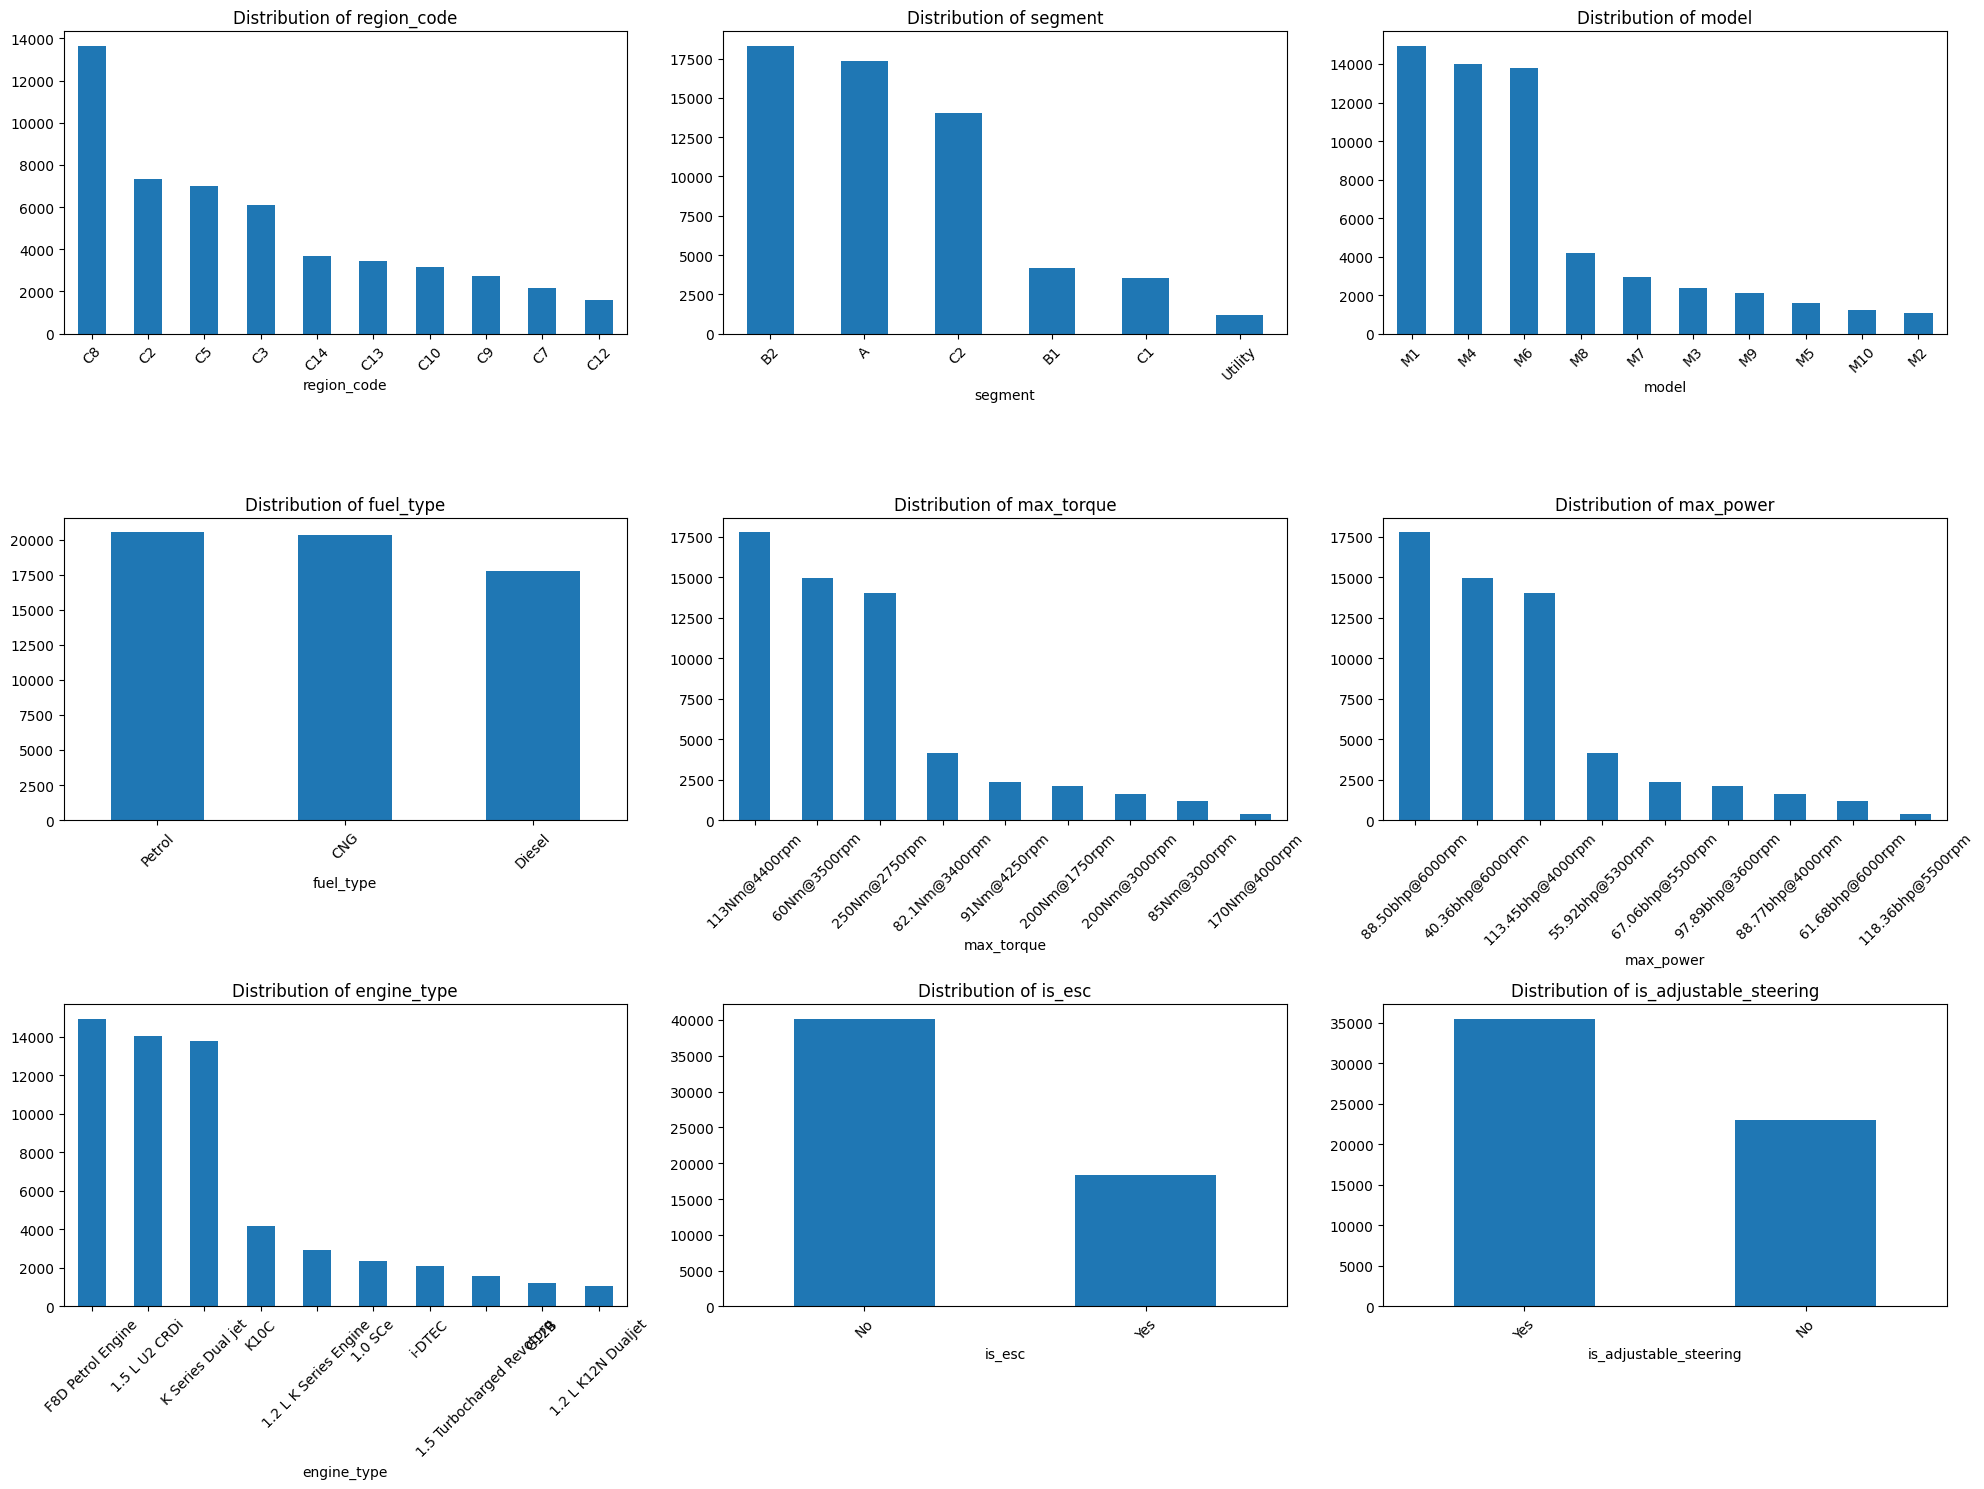

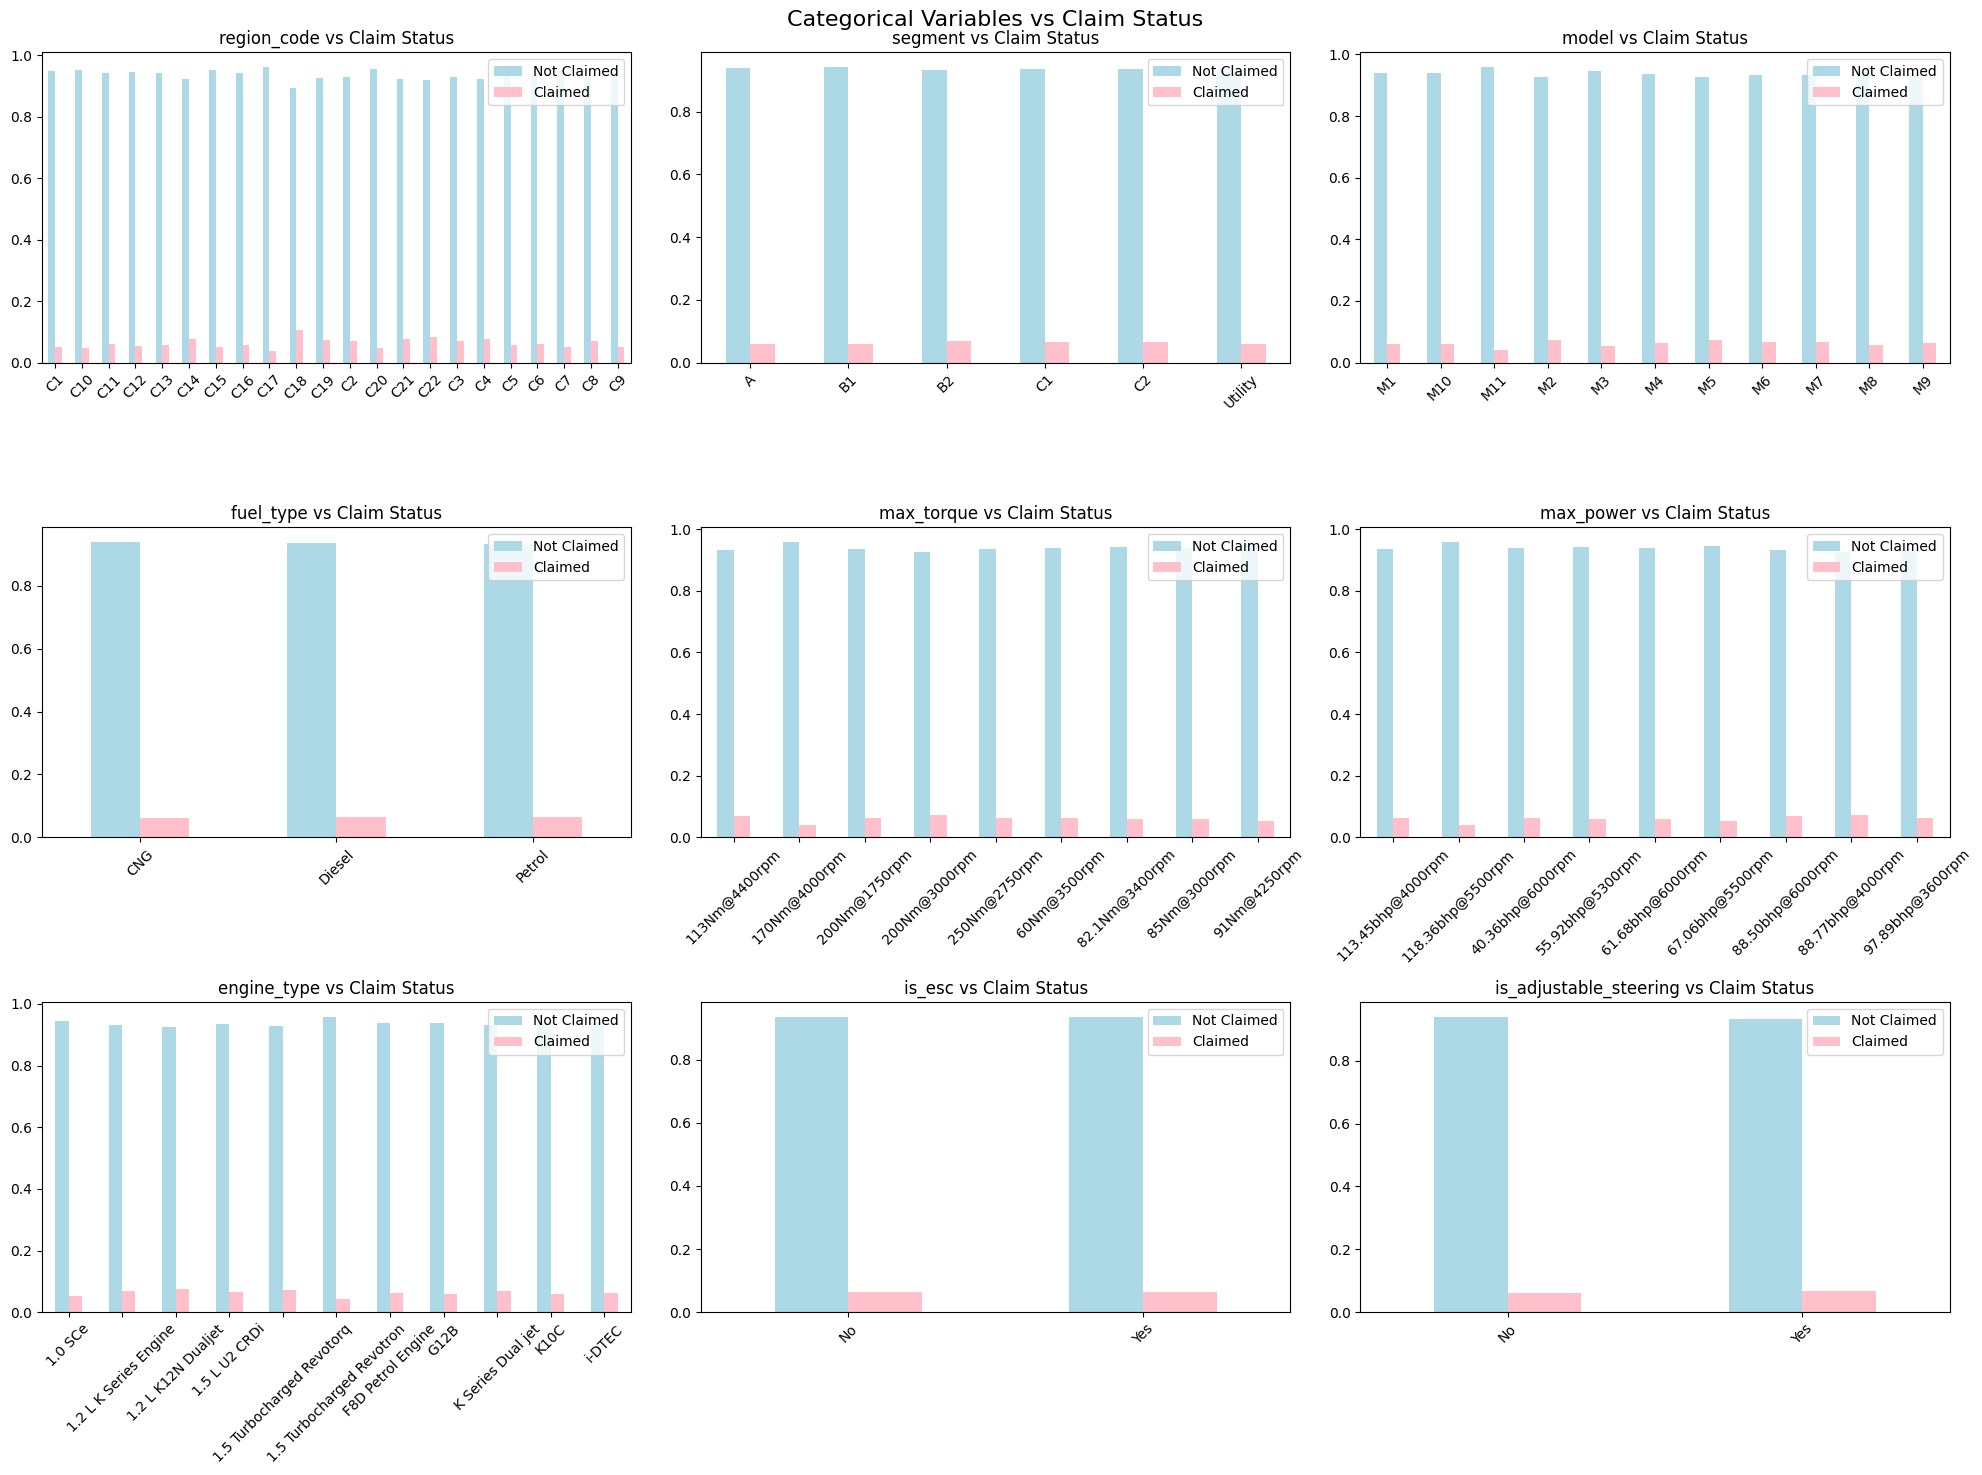


Shape before encoding: (58592, 41)
Shape after encoding: (58592, 99)

Categorical variables have been encoded using one-hot encoding.


In [19]:
# Copy of the original dataset (for visualization)
insurance_raw = insurance_claim.copy()

# List of categorical variables
categorical_cols = insurance_raw.select_dtypes(include=['object']).columns.tolist()

#we remove the identifier column (not a real categorical variable)
categorical_cols = [c for c in categorical_cols if c != 'policy_id']

print("Categorical columns:", categorical_cols)

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols[:9], 1):
    plt.subplot(3, 3, i)
    insurance_raw[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Categorical Variables vs Claim Status', fontsize=16)

for i, col in enumerate(categorical_cols[:9]):
    row, col_idx = i // 3, i % 3

    cross_tab = pd.crosstab(
        insurance_raw[col],
        insurance_raw['claim_status'],
        normalize='index'
    )

    cross_tab.plot(
        kind='bar',
        ax=axes[row, col_idx],
        color=['lightblue', 'pink']
    )

    axes[row, col_idx].set_title(f'{col} vs Claim Status')
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].legend(['Not Claimed', 'Claimed'])
    axes[row, col_idx].tick_params(axis='x', rotation=45)

if len(categorical_cols) < 9:
    for i in range(len(categorical_cols), 9):
        row, col_idx = i // 3, i % 3
        axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\nShape before encoding:", insurance_claim.shape)

insurance_claim = pd.get_dummies(
    insurance_claim,
    columns=categorical_cols,
    drop_first=True
)

print("Shape after encoding:", insurance_claim.shape)
print("\nCategorical variables have been encoded using one-hot encoding.")

**Distribution of categorical variables (Top 10 categories)**

In [20]:
import plotly.express as px
insurance_raw_2 = pd.read_csv('Insurance_claims_data.csv')

categorical_cols = insurance_raw_2.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != 'policy_id']

for col in categorical_cols[:9]:
    df_plot = (
        insurance_raw_2[col]
        .value_counts()
        .head(10)
        .reset_index(name="count")
        .rename(columns={"index": col})
    )


    fig = px.bar(
        df_plot,
        x=col,
        y="count",
        title=f"Top categories for {col}",
        text="count"
    )
    fig.update_layout(xaxis_tickangle=45)
    fig.show()

In [21]:
import plotly.express as px

for col in ["segment", "fuel_type", "region_code", "model"]:
    df_rate = (
        insurance_raw.groupby(col)["claim_status"].mean().reset_index()
    )
    df_rate["claim_status"] *= 100

    fig = px.imshow(
        df_rate.pivot_table(values="claim_status", index=col),
        text_auto=True,
        color_continuous_scale="Reds",
        title=f"Claim Rate Heatmap (%) for {col}"
    )
    fig.update_layout(width=700, height=1200)
    fig.show()

In [22]:
df_sun = (
    insurance_raw
    .groupby(["segment", "model"])["claim_status"]
    .mean()
    .reset_index()
)

df_sun["claim_rate"] = df_sun["claim_status"] * 100
fig = px.sunburst(
    df_sun,
    path=["segment", "model"],
    values="claim_rate",
    color="claim_rate",
    color_continuous_scale="Reds",
    title="Claim Rate (%) by Segment and Model"
)

fig.update_traces(textinfo='label+percent entry')
fig.show()

The sunburst chart shows that claim rates across segments and models remain between 4% and 7%.
This limited variation is fully consistent with our Random Forest feature importance, which indicates that vehicle characteristics (segment/model) have a weak global impact on claim prediction.
Instead, customer-related variables (subscription length, customer age, vehicle age) play a much larger role, which is aligned with insurance risk theory.

In [23]:
fig = px.scatter_3d(
    insurance_raw,
    x="vehicle_age",
    y="region_density",
    z="subscription_length",
    color="claim_status",
    opacity=0.6,
    title="3D Scatter: Exploring Multi-dimensional Patterns"
)
fig.show()

The 3D scatter plot illustrates the joint relationship between vehicle age, regional density, and subscription length, with points colored by claim status. The visualization shows strong overlap between claim and no-claim observations across the three dimensions, indicating that no simple threshold or linear separation can distinguish claim occurrences. Claims appear scattered throughout the space rather than concentrated in a specific region, suggesting that claim risk depends on complex interactions between variables rather than on individual features alone.

In [24]:
df_treemap = (
    insurance_raw
    .groupby(["segment", "fuel_type"])["claim_status"]
    .mean()
    .reset_index()
)
df_treemap["claim_rate"] = df_treemap["claim_status"] * 100

fig = px.treemap(
    df_treemap,
    path=["segment", "fuel_type"],
    values="claim_rate",
    color="claim_rate",
    color_continuous_scale="Reds",
    title="Treemap: Claim Rate by Segment and Fuel Type"
)
fig.show()

In [25]:
import plotly.express as px
import pandas as pd

#select numerical columns
numeric_cols = insurance_claim.select_dtypes(include=['int64', 'float64']).columns.tolist()

#we remove the target variable
numeric_cols = [c for c in numeric_cols if c != "claim_status"]

#compute correlation
corr_series = insurance_claim[numeric_cols + ["claim_status"]].corr()["claim_status"].drop("claim_status").abs()

corr_df = corr_series.reset_index().rename(columns={"index": "feature", "claim_status": "corr_abs"})

corr_df = corr_df.sort_values("corr_abs", ascending=True)

fig = px.bar(
    corr_df,
    x="corr_abs",
    y="feature",
    orientation="h",
    color="corr_abs",
    color_continuous_scale="Viridis",
    title="Absolute correlation of each numerical variable with claim_status",
    labels={"corr_abs": "|correlation|", "feature": "Variable"},
    text_auto=".3f"
)

fig.update_layout(
    height=800,
    margin=dict(l=200, r=20, t=80, b=20),
    xaxis_tickformat=".2f"
)

fig.show()

###Numerical columns are explicitly identified to apply feature scaling within the preprocessing pipeline and to analyze their distributions before modeling.

A preprocessing pipeline is built using a ColumnTransformer to handle numerical and categorical variables consistently. Numerical features are standardized with StandardScaler to ensure comparable scales and prevent dominance of large-valued variables. Categorical features are encoded using one-hot encoding, which allows models to process non-numeric information without imposing artificial ordering.

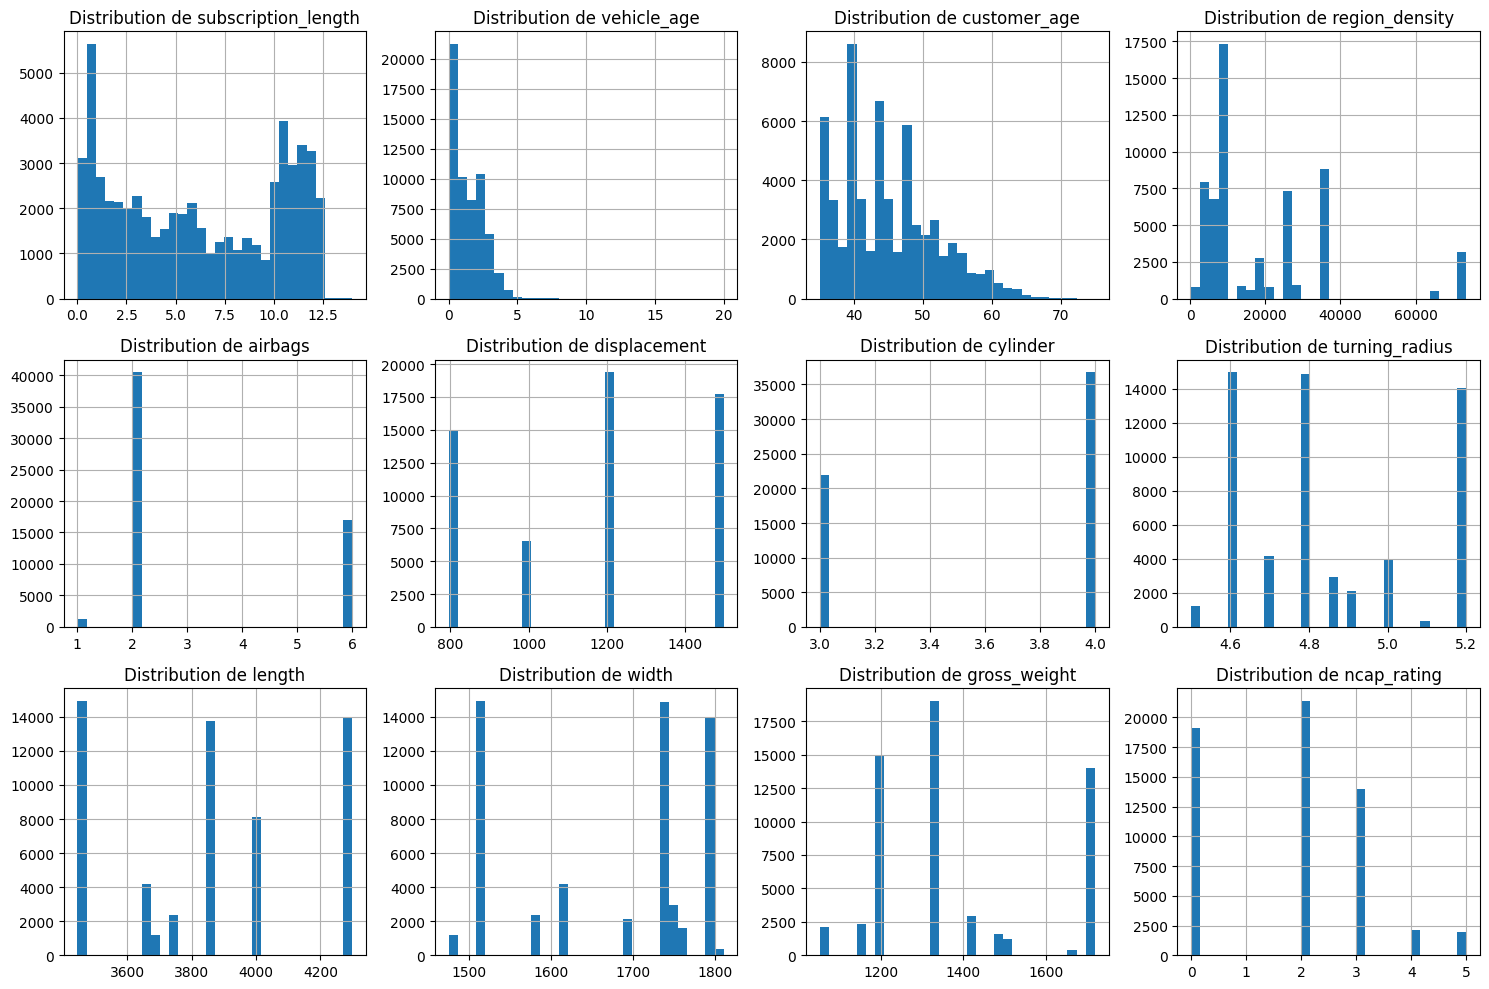

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# list of numerical columns used for scaling
numerical_cols = ['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
                 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
                 'width', 'gross_weight', 'ncap_rating']

# define preprocessing steps inside a pipeline
# numerical features are standardized
# categorical features are one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# plot histograms of numerical variables to visualize their distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:12], 1):
    plt.subplot(3, 4, i)
    insurance_claim[col].hist(bins=30)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# 4) Problem Formalization

The objective of this project is to understand and predict which factors influence the probability that a customer will file an auto insurance claim. To address this question, we formalize the task as a supervised binary classification problem.

### **Target variable**

The target variable used in this study is claim_status, which indicates whether a customer submitted a claim during the insurance period:

* 0 : no claim  
* 1 : claim filed

The distribution of the target variable shows that most customers do not file a claim, which creates a class imbalance. This imbalance must be considered when evaluating model performance, since accuracy alone can be misleading.

### **Input features**

The dataset contains a combination of customer, vehicle, policy, and regional features that may influence claim probability.

These features represent possible risk factors and will serve as inputs to our machine learning models.

### **Machine learning objective**

The goal is to build a model capable of predicting whether a given customer is likely to file an insurance claim. This involves identifying the most influential features, understanding patterns associated with high-risk customers, and evaluating the model's ability to correctly detect claims, which is the minority class.

Because the dataset is imbalanced, performance metrics such as precision, recall, and F1-score for the positive class are more informative than accuracy.

### **Business relevance**

This problem is relevant for the insurance industry because it helps optimize risk assessment and premium pricing, supports better fraud detection and customer segmentation, improves claim prevention strategies, and increases the overall efficiency of insurance operations.

Understanding the key factors that influence claim probability allows insurers to make better decisions while maintaining a balanced and sustainable risk portfolio.

## 5)Baseline Model
### 5.1) Model selection

In this section, we select a simple and interpretable model that will serve as our baseline.  
We choose Logistic Regression because:

* it is fast to train and easy to interpret  
* it is commonly used for binary classification problems  
* it integrates well into a preprocessing pipeline  
* it supports class imbalance using "class_weight=balanced"

Since our target variable is highly imbalanced (very few claims compared to non-claims),  
we activate class balancing and set max_iter=200 to ensure convergence.

Below is the implementation of the baseline model inside a pipeline that includes all preprocessing steps.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
#to make sure we start with a fresh dataset
df_model = pd.read_csv("Insurance_claims_data.csv")

target_col = "claim_status"

#we remove the id
X = df_model.drop(columns=[target_col, "policy_id"])
y = df_model[target_col]

#separation num /cat
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

print("Numeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Numeric features: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating']
Categorical features: ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


### 5.2) Train–test split

Before training the model, we split the dataset into a training set and a test set.  
We use a 70/30 split with stratification to preserve the ratio between class 0 and class 1 in both datasets.  
This is important due to the strong imbalance in the target variable.

X contains all feature columns, and y contains the target column "claim_status".

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((41014, 39), (17578, 39))

### 5.3) Training the baseline model


We now train (fit) the baseline Logistic Regression model on the training set.  
The preprocessing pipeline is applied automatically to the input data before model training.

This ensures:

* imputation of numerical and categorical missing values  
* scaling of numerical features  
* one-hot encoding of categorical features  
* no data leakage (train processing ≠ test processing)

In [30]:
#baseline model using a pipeline to ensure consistent preprocessing
baseline_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
        max_iter=200,
        class_weight="balanced",#to handle the imbalancy
        n_jobs=-1,
        random_state=42
    ))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

### 5.4) Making predictions

Once the model is trained, we use it to make predictions on the test set.  
The output y_pred contains the predicted class (0 or 1) for each sample.

We also compute prediction probabilities for the positive class (claim = 1), useful for advanced analysis.

In [31]:
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

y_pred[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

The model predicts both classes, but because the dataset is highly **imbalanced**, it generates many false positives and still struggles to correctly identify claim cases.

### 5.5) Evaluation metrics

To evaluate the baseline model, we compute:

* Accuracy  
* Precision (class 1)  
* Recall (class 1)  
* F1-score (class 1)  
* Classification report  
* Confusion matrix  

Because the dataset is imbalanced, accuracy alone is not reliable.  
Recall and F1-score for class 1 (claims) are the most important metrics.

In [32]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision (class 1):", precision)
print("Recall (class 1):", recall)
print("F1-score (class 1):", f1)

print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5634315621799977
Precision (class 1): 0.08794665324609965
Recall (class 1): 0.6218861209964412
F1-score (class 1): 0.1541005291005291

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     16454
           1       0.09      0.62      0.15      1124

    accuracy                           0.56     17578
   macro avg       0.52      0.59      0.43     17578
weighted avg       0.90      0.56      0.67     17578



The baseline Logistic Regression model obtains an overall accuracy of 56%, but this metric is not very meaningful due to the strong class imbalance in the dataset. For the no-claim class (0), the model performs well with a very high precision of 0.96, meaning almost all predicted non-claims are correct, and a recall of 0.56, indicating that it correctly identifies just over half of the true non-claims. For the claim class (1), the model behaves differently: it achieves a relatively high recall of 0.62, meaning it successfully detects many real claims, but its precision is extremely low at 0.09, showing that most predicted claims are actually false positives. As a result, the F1-score for class 1 remains low (0.15). Overall, the model is able to capture a significant proportion of real claims but at the cost of generating many incorrect claim predictions, which highlights the difficulty of this imbalanced classification task.

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=["True 0 (no claim)", "True 1 (claim)"],
    columns=["Pred 0 (no claim)", "Pred 1 (claim)"]
)

fig = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale="Blues",
    title="Interactive Confusion Matrix - Baseline Logistic Regression"
)

fig.update_xaxes(title="Predicted label")
fig.update_yaxes(title="True label")

fig.update_layout(height=400, width=500)

fig.show()


The confusion matrix confirms that the baseline logistic regression detects a large proportion of true claims but generates many false positives, which is expected given the strong class imbalance and the use of class weighting.

# 6) PCA

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#select numerical features only for our dataset
X_num = insurance_claim[numerical_cols]

#standardize numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

#apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.54956933 0.09697816]
Cumulative explained variance: 0.6465474916906199


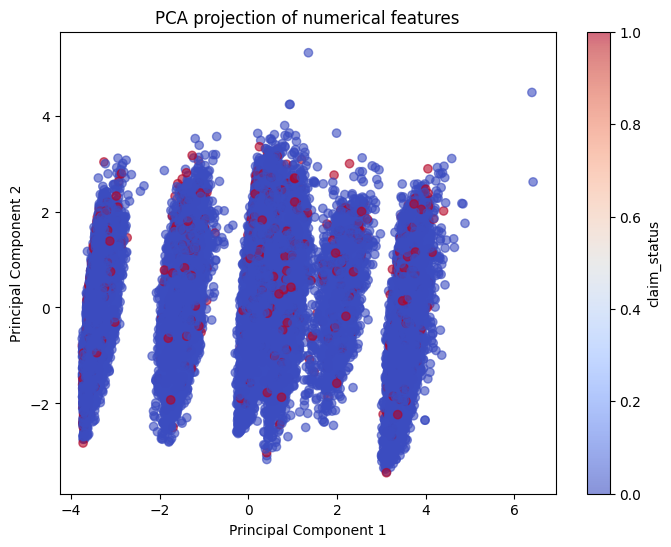

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=insurance_claim["claim_status"],
    cmap="coolwarm",
    alpha=0.6
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA projection of numerical features")
plt.colorbar(label="claim_status")
plt.show()

The PCA projection of numerical features shows that the first two principal components explain approximately 65% of the total variance. While this indicates a strong underlying structure in the data, the projection reveals a significant overlap between claim and no-claim observations. This lack of clear separation confirms that claim occurrence cannot be explained by simple linear combinations of numerical variables. Consequently, more flexible non-linear models and ensemble methods are required to capture complex interactions and heterogeneous risk profiles in an insurance context.

# 7) Random Forest

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [35]:
df = pd.read_csv("Insurance_claims_data.csv")

target_col = "claim_status"

X = df.drop(columns=[target_col, "policy_id"])
y = df[target_col]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

print("Numeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"#important because we have 6% positive only
    ))
])

#Train the Random Forest
rf_pipe.fit(X, y)

print("Random Forest trained successfully !")

#Extract feature importances

#Get the transformed column names (after OneHotEncoder)
cat_encoded = rf_pipe.named_steps["preprocess"]\
                    .named_transformers_["cat"]\
                    .named_steps["encoder"]\
                    .get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([numeric_features, cat_encoded])

#get feature importances from the RF
importances = rf_pipe.named_steps["rf"].feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

#top 20 most important variables
print("\nTop 20 most important features:")
print(feat_imp.head(20))

Numeric features: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating']
Categorical features: ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
Random Forest trained successfully !

Top 20 most important features:
                feature  importance
0   subscription_length    0.388194
2          customer_age    0.257165
1           vehicle_age    0.233622
3        region_density    0.027900
32       r

The Random Forest feature importance confirms that claim risk is not driven by a single variable but by a combination of customer, vehicle, and contextual factors.

While a few numerical variables such as subscription_length, customer_age, and vehicle_age clearly dominate the global importance, many categorical variables especially regional indicators—still contribute marginal but non-negligible information.

In insurance, these small effects are meaningful because risk segmentation relies on the accumulation of weak signals rather than on one decisive factor. Removing variables with lower individual importance could therefore reduce the model's ability to capture heterogeneous risk profiles and interactions.

For this reason, all variables are retained to preserve both predictive performance and actuarial consistency.

# **Conlusion Step 1**

These results are expected at this stage because we are using a simple baseline model (Logistic Regression) on a highly imbalanced dataset. Since only 6% of the customers file a claim, the model tends to predict the majority class, which leads to many false positives and a low precision for class 1. However, the model still achieves a relatively high recall for claims, meaning it captures a good portion of real claim cases. This confirms that a linear baseline is not sufficient and motivates the need for more advanced models such as Decision Trees, SVMs, and ensemble methods in the next steps.

# **Step 2**

###Decision Tree + GridSearchCV

We tune a Decision Tree using GridSearchCV to find its best hyperparameters and use it as a non-linear baseline. Up to this point, we only explored the data and tested a simple linear baseline model, so this step allows us to move to a more flexible model that can capture complex interactions that Logistic Regression could not.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

In [37]:
# Pipeline combining preprocessing steps and a Decision Tree classifier
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

# Hyperparameter grid for Decision Tree tuning
param_grid_tree = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [2, 4, 6, 8, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4]}

# Define F1-score as the evaluation metric (focused on the minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# GridSearchCV to test all hyperparameter combinations using cross-validation
grid_tree = GridSearchCV(
    estimator=tree_pipe,
    param_grid=param_grid_tree,
    cv=2,
    scoring=f1_scorer,
    refit=True,
    verbose=1,
    n_jobs=-1)

#train the models and perform hyperparameter optimization
grid_tree.fit(X_train, y_train)

# Display the best hyperparameters and cross-validation score
print("Decision Tree - GridSearchCV")
print("Best parameters:", grid_tree.best_params_)
print("Best CV score:", grid_tree.best_score_)

#retrieve the best-performing model
best_tree = grid_tree.best_estimator_

#generate predictions on the test set
y_pred_tree = best_tree.predict(X_test)

# Evaluate model performance on the test set
print("\nDecision Tree - Test set")
print(classification_report(y_test, y_pred_tree))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_tree))


Fitting 2 folds for each of 162 candidates, totalling 324 fits
Decision Tree - GridSearchCV
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
Best CV score: 0.15409713440482822

Decision Tree - Test set
              precision    recall  f1-score   support

           0       0.96      0.52      0.67     16454
           1       0.09      0.71      0.16      1124

    accuracy                           0.53     17578
   macro avg       0.53      0.62      0.42     17578
weighted avg       0.91      0.53      0.64     17578

Confusion matrix:
 [[8509 7945]
 [ 321  803]]


Compared to the baseline model, the Decision Tree optimized with class weighting and F1-score significantly improves the detection of insurance claims, reaching a recall of around 70% for the minority class. This improvement comes at the cost of a lower overall accuracy and a high number of false positives, which is expected in the context of a highly imbalanced dataset. These results confirm the relevance of using non-linear models and motivate the use of ensemble methods in the next step of the project.

###Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier

In [39]:
# bagging around the best decision tree
bagging_tree = BaggingClassifier(
    estimator=best_tree.named_steps["clf"],
    n_estimators=200,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# pipeline: preprocessing + bagging
bagging_tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", bagging_tree)
])

# training
bagging_tree_pipe.fit(X_train, y_train)

# prediction
y_pred_bag_tree = bagging_tree_pipe.predict(X_test)

print("\nbagging decision tree - test set")
print(classification_report(y_test, y_pred_bag_tree))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_bag_tree))


bagging decision tree - test set
              precision    recall  f1-score   support

           0       0.96      0.54      0.70     16454
           1       0.10      0.71      0.17      1124

    accuracy                           0.55     17578
   macro avg       0.53      0.63      0.43     17578
weighted avg       0.91      0.55      0.66     17578

confusion matrix:
 [[8938 7516]
 [ 326  798]]


###Voting

In [40]:
# logistic regression as a second base model
logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

# soft voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ("bag_tree", bagging_tree_pipe),
        ("logreg", logreg_pipe)
    ],
    voting="soft"
)

# training
voting_clf.fit(X_train, y_train)

# prediction
y_pred_vote = voting_clf.predict(X_test)

print("\nvoting classifier (bagging tree + logistic regression) - test set")
print(classification_report(y_test, y_pred_vote))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_vote))


voting classifier (bagging tree + logistic regression) - test set
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     16454
           1       0.10      0.68      0.17      1124

    accuracy                           0.57     17578
   macro avg       0.53      0.62      0.44     17578
weighted avg       0.91      0.57      0.68     17578

confusion matrix:
 [[9283 7171]
 [ 360  764]]


The ensemble results are consistent with expectations for a highly imbalanced dataset. Bagging improves the stability of the decision tree while preserving a high recall for claims. The voting classifier slightly reduces recall but improves overall accuracy by combining the strengths of a linear and a non-linear model. These results highlight the trade-off between claim detection and false positives and confirm the relevance of ensemble methods.

##Lime

In [42]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d2364a700e55542db7f97bd53dcf45b881271fb3f2d6ac739acebfcad9ea18cd
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [43]:
# lime for bagging and voting (clean sklearn pipeline)

from lime.lime_tabular import LimeTabularExplainer

from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
#build a clean voting pipeline: preprocess -> voting

# get best decision tree hyperparameters from the gridsearch
best_dt_params = grid_tree.best_params_

# build the tuned decision tree classifier
dt_best = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    criterion=best_dt_params["clf__criterion"],
    max_depth=best_dt_params["clf__max_depth"],
    min_samples_split=best_dt_params["clf__min_samples_split"],
    min_samples_leaf=best_dt_params["clf__min_samples_leaf"],
)

# bagging around the tuned decision tree
bagging_tree_clf = BaggingClassifier(
    estimator=dt_best,
    n_estimators=200,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# logistic regression classifier
logreg_clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# soft voting on probabilities
voting_clf_clean = VotingClassifier(
    estimators=[
        ("bag_tree", bagging_tree_clf),
        ("logreg", logreg_clf)
    ],
    voting="soft"
)

# final pipeline
voting_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", voting_clf_clean)
])

# train
voting_pipe.fit(X_train, y_train)

cat_feature_names = (
    voting_pipe.named_steps["preprocess"]
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_features)
)

feature_names = np.concatenate([numeric_features, cat_feature_names])

#transform data for LIME (convert to dense if sparse)

X_train_enc = voting_pipe.named_steps["preprocess"].transform(X_train)
X_test_enc  = voting_pipe.named_steps["preprocess"].transform(X_test)

if hasattr(X_train_enc, "toarray"):
    X_train_enc = X_train_enc.toarray()
if hasattr(X_test_enc, "toarray"):
    X_test_enc = X_test_enc.toarray()

explainer = LimeTabularExplainer(
    training_data=X_train_enc,
    feature_names=feature_names,
    class_names=["no_claim", "claim"],
    mode="classification",
    discretize_continuous=True
)


#explain one prediction
i = 10
instance = X_test_enc[i]

#explain the final voting decision (probabilities)
exp = explainer.explain_instance(
    instance,
    voting_pipe.named_steps["clf"].predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)

For this specific policyholder, LIME shows that the model predicts a slightly higher probability of claim (55%) than no claim (45%), indicating an uncertain but risk-leaning profile. The most influential variable is subscription_length, which strongly pushes the prediction toward a claim, suggesting that longer contract duration is associated with higher observed risk in the data. Several regional indicators (such as region_code_C18, C9, C15, C4, and C19) also contribute to the decision, reflecting geographical differences in claim frequency. In addition, vehicle characteristics like engine type and the absence of power steering have a smaller but positive impact on claim risk. From an insurance perspective, this result is coherent: claim probability is driven by a combination of exposure duration, geographic risk, and vehicle features rather than a single dominant factor, which explains why the prediction remains close to the decision boundary.

##SVM

As a final extension, a Support Vector Machine (SVM) is introduced as an additional benchmark. Due to the high dimensionality of the dataset after one-hot encoding, a linear SVM is selected for computational efficiency. Class balancing is applied to handle the strong class imbalance, and the regularization parameter is tuned using GridSearchCV with the F1-score as the evaluation metric. This model provides a robust comparison with tree-based and ensemble methods.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
import pandas as pd

In [48]:
svm_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LinearSVC(
        class_weight="balanced",#to handle class imbalance
        random_state=42,
        max_iter=30000
    ))
])

#hyperparameter grid (small, standard, efficient)
param_grid_svm = {
    "clf__C": [0.1, 1, 10]
}

#scoring focused on minority class
f1_scorer = make_scorer(f1_score, pos_label=1)

grid_svm = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid_svm,
    cv=5,
    scoring=f1_scorer,
    refit=True,
    n_jobs=-1,
    verbose=1
)

#train
grid_svm.fit(X_train, y_train)

print("svm (linear) - gridsearchcv")
print("best params:", grid_svm.best_params_)
print("best cv f1:", grid_svm.best_score_)

# test evaluation
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("\nsvm (linear) - test set")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
svm (linear) - gridsearchcv
best params: {'clf__C': 0.1}
best cv f1: 0.14371466016001438

svm (linear) - test set
              precision    recall  f1-score   support

           0       0.96      0.56      0.70     16454
           1       0.09      0.62      0.15      1124

    accuracy                           0.56     17578
   macro avg       0.52      0.59      0.43     17578
weighted avg       0.90      0.56      0.67     17578

confusion matrix:
 [[9188 7266]
 [ 425  699]]


Compared to the linear SVM, the Decision Tree achieves a higher recall and F1-score for the claim class, indicating a better ability to detect true claims.

##Gradient boosting benchmark

Given the limited improvement provided by linear SVMs, we introduce a gradient boosting model to better capture non-linear interactions and weak signals in tabular insurance data, where claim risk is driven by complex combinations of customer, vehicle, and contextual features.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [50]:
#pipeline: preprocessing + gradient boosting
gb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", HistGradientBoostingClassifier(
        random_state=42
    ))
])

# hyperparameter grid
#HGB is fast and usually strong on tabular data
param_grid_gb = {
    "clf__max_depth": [3, 6, None],
    "clf__learning_rate": [0.05, 0.1],
    "clf__max_iter": [200, 400],
    "clf__min_samples_leaf": [20, 50]
}

#we focus on minority class with f1
f1_scorer = make_scorer(f1_score, pos_label=1)

grid_gb = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid_gb,
    cv=5,
    scoring=f1_scorer,
    refit=True,
    n_jobs=-1,
    verbose=1
)

#training
grid_gb.fit(X_train, y_train)

print("histgradientboosting - gridsearchcv")
print("best params:", grid_gb.best_params_)
print("best cv f1:", grid_gb.best_score_)

# test evaluation
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("\nhistgradientboosting - test set")
print(classification_report(y_test, y_pred_gb, zero_division=0))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_gb))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
histgradientboosting - gridsearchcv
best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__max_iter': 200, 'clf__min_samples_leaf': 20}
best cv f1: 0.0

histgradientboosting - test set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578

confusion matrix:
 [[16454     0]
 [ 1124     0]]


Although Gradient Boosting is a powerful non-linear model, the results show that it completely fails to detect claims in this highly imbalanced dataset. The model converges to a trivial solution where all observations are classified as no-claim, leading to a high accuracy but a zero recall and F1-score for the minority class. This highlights the importance of explicitly handli

# **Conclusion**

This project aimed to model and understand insurance claim occurrence using a highly imbalanced real-world dataset. After an extensive exploratory data analysis and careful preprocessing, a logistic regression model was implemented as a baseline. While this baseline was able to detect a significant proportion of claims, its linear structure and low precision highlighted important limitations.

More flexible models were then introduced. The Decision Tree improved claim detection by capturing non-linear patterns, at the cost of increased false positives. Ensemble methods, particularly Bagging and Voting, provided the best trade-off by stabilizing predictions and improving robustness while maintaining a high recall for claims. Additional benchmarks, such as linear SVM and Gradient Boosting, confirmed that models which do not explicitly handle class imbalance tend to favor the majority class and are therefore less suitable for this problem.

Interpretability tools such as Random Forest feature importance and LIME explanations showed that claim risk is driven by the combination of multiple weak signals rather than by a small subset of dominant variables. Consequently, all variables were retained to preserve both predictive performance and actuarial consistency.

Overall, this study demonstrates that, in an insurance context, model evaluation must go beyond accuracy and focus on metrics such as recall and F1-score for the minority class. Ensemble tree-based models emerge as the most appropriate solution, offering a balance between performance, robustness, and interpretability.